

<u><b>Lab - 2 : </b></u> Image Enhancement using Spatial Domain Filtering

Objectives:









Reading and displaying an image in python

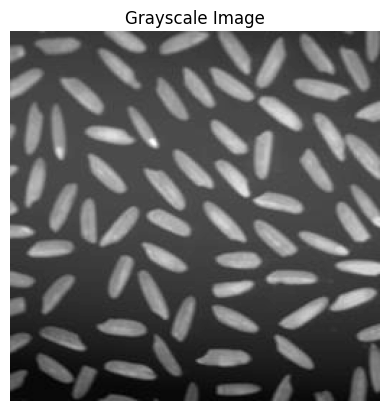

In [1]:

import cv2
import matplotlib.pyplot as plt

image = cv2.imread("rice.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()


 Averaging/smoothing mask on image

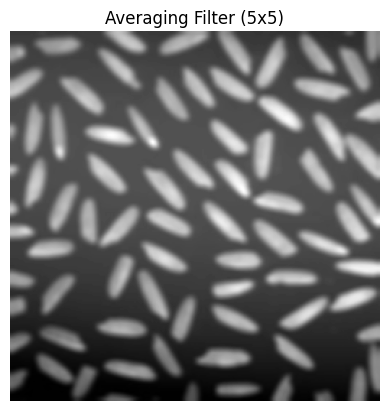

In [2]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

avg_filtered = cv2.blur(gray, (5, 5))

plt.imshow(avg_filtered, cmap='gray')
plt.title("Averaging Filter (5x5)")
plt.axis('off')
plt.show()


  Averaging mask for noise removal



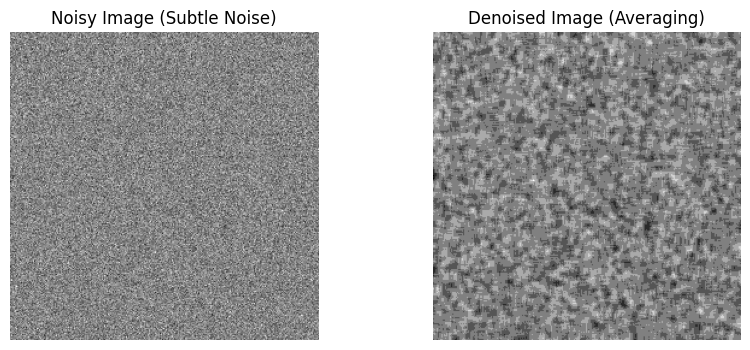

In [3]:

noisy_img = gray.copy()
cv2.randn(noisy_img, 96, 3)  # reduce the standard deviation to make noise more subtle

denoised = cv2.blur(noisy_img, (5, 5))

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.imshow(noisy_img, cmap='gray')
plt.title("Noisy Image (Subtle Noise)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(denoised, cmap='gray')
plt.title("Denoised Image (Averaging)")
plt.axis('off')
plt.show()


Median Filter for Salt and Pepper Noise

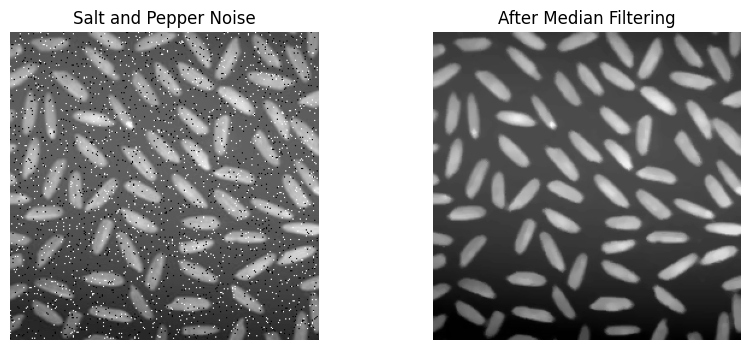

In [4]:

sp_noise = gray.copy()
salt_pepper_prob = 0.05
num_salt = np.ceil(salt_pepper_prob * gray.size * 0.5)
num_pepper = np.ceil(salt_pepper_prob * gray.size * 0.5)

coords_salt = [np.random.randint(0, i - 1, int(num_salt)) for i in gray.shape]
coords_pepper = [np.random.randint(0, i - 1, int(num_pepper)) for i in gray.shape]

sp_noise[tuple(coords_salt)] = 255
sp_noise[tuple(coords_pepper)] = 0

median_filtered = cv2.medianBlur(sp_noise, 5)

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.imshow(sp_noise, cmap='gray')
plt.title("Salt and Pepper Noise")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(median_filtered, cmap='gray')
plt.title("After Median Filtering")
plt.axis('off')
plt.show()


 Edge detection using 1st order deriavtive (Image Gradients)

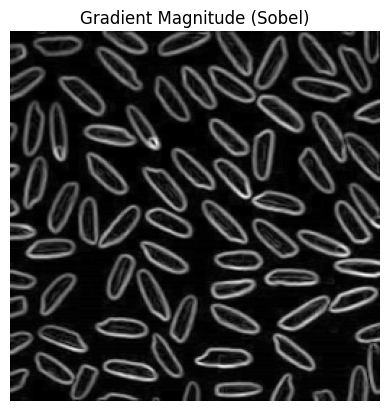

In [6]:

sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
gradient_magnitude = cv2.magnitude(sobelx, sobely)

plt.imshow(gradient_magnitude, cmap='gray')
plt.title("Gradient Magnitude (Sobel)")
plt.axis('off')
plt.show()


 Edge detection using 2nd order deriavtive (Laplacian)

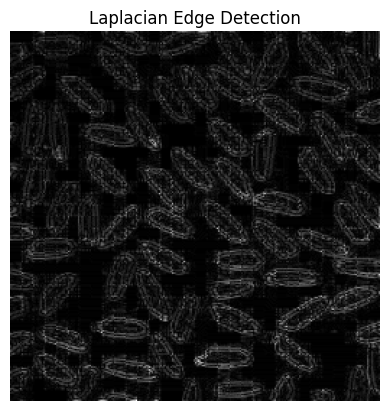

In [7]:

laplacian = cv2.Laplacian(gray, cv2.CV_64F)

plt.imshow(np.abs(laplacian), cmap='gray')
plt.title("Laplacian Edge Detection")
plt.axis('off')
plt.show()


 Laplacian of Gaussian (LoG)

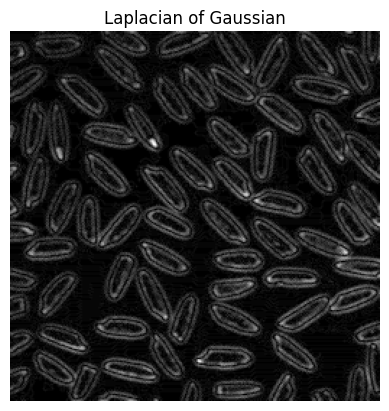

In [8]:

blurred = cv2.GaussianBlur(gray, (5, 5), 0)
log = cv2.Laplacian(blurred, cv2.CV_64F)

plt.imshow(np.abs(log), cmap='gray')
plt.title("Laplacian of Gaussian")
plt.axis('off')
plt.show()


# Conclusion

In this lab, we explored various spatial domain filtering techniques for image enhancement. We started with basic image reading and visualization, followed by applying smoothing filters like averaging and median filters to reduce noise. We also performed edge detection using first-order derivatives (Sobel operator) and second-order derivatives (Laplacian operator). Finally, we combined Gaussian smoothing with the Laplacian operator to implement the Laplacian of Gaussian (LoG) for edge detection. These techniques are fundamental in image processing and provide a strong foundation for advanced computer vision tasks.